In [1]:
# Clone the GitHub repo and move into it
!git clone https://github.com/Niccolo901/massive-data-analysis-project.git
%cd massive-data-analysis-project


C:\Users\cibei\OneDrive\Desktop\Big data\Bigdata_project\massive-data-analysis-project


Cloning into 'massive-data-analysis-project'...


## Dataset Download

In [1]:
# NOTE:
# For simplicity and modularity, we use the following function to download and extract the dataset:
#from Code.dataset_download import download_dataset
#download_dataset()
#
# This handles authentication and file management cleanly.
# However, in accordance with the exam instructions, a separate cell is provided using:
# os.environ['KAGGLE_USERNAME'] + !kaggle datasets download
# to comply with the required method for dataset access in Google Colab.


Dataset already exists at 'dataset\Books_data.csv'. Skipping download.


'dataset\\Books_data.csv'

In [2]:
# Install Kaggle CLI
!pip install -q kaggle

import os, json

# Set up Kaggle API credentials (replace locally only, then restore to "xxxxxx")
api_token = {"username": "xxxxxx", "key": "xxxxxx"}

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(api_token, f)

!chmod 600 /root/.kaggle/kaggle.json

# Download and extract both files into dataset/
os.makedirs("dataset", exist_ok=True)
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews -p dataset
!unzip -q -o dataset/amazon-books-reviews.zip -d dataset
!rm dataset/amazon-books-reviews.zip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
"chmod" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.



  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:00<11:43, 1.62MB/s]
  0%|          | 2.00M/1.06G [00:00<07:09, 2.65MB/s]
  0%|          | 3.00M/1.06G [00:01<05:42, 3.32MB/s]
  0%|          | 4.00M/1.06G [00:01<04:42, 4.03MB/s]
  0%|          | 5.00M/1.06G [00:01<04:47, 3.95MB/s]
  1%|          | 6.00M/1.06G [00:01<04:05, 4.62MB/s]
  1%|          | 7.00M/1.06G [00:01<04:07, 4.58MB/s]
  1%|          | 8.00M/1.06G [00:02<04:14, 4.45MB/s]
  1%|          | 9.00M/1.06G [00:02<04:36, 4.10MB/s]
  1%|          | 10.0M/1.06G [00:02<04:23, 4.29MB/s]
  1%|          | 11.0M/1.06G [00:02<04:17, 4.38MB/s]
  1%|          | 12.0M/1.06G [00:03<04:20, 4.32MB/s]
  1%|          | 13.0M/1.06G [00:03<04:17, 4.38MB/s]
  1%|▏         | 14.0M/1.06G [00:03<04:04, 4.60MB/s]
  1%|▏         | 15.0M/1.06G [00:03<03:54, 4.79MB/s]
  1%|▏         | 16.0M/1.06G [00:04<04:11, 4.47MB/s]
  2%|▏         | 17.0M/1.06G [00:04<03:52, 4.83MB/s]
  2%|▏         | 18.0M/1.06G [00:04<03:35, 5.20MB/s]
 

In [1]:
import nest_asyncio
nest_asyncio.apply()


### Dataset subset

In [2]:
from Code.sample_dataset import create_books_subdata

subdata = create_books_subdata()


Top categories sampled:
categories
['Fiction']     333
['Religion']    333
['History']     333
Name: count, dtype: int64

Total rows in books_subdata: 999
Saved to: dataset/books_subdata.csv


### Images download

In [2]:
from Code.book_pipeline import run_download, split_dataset, create_dataset_from_df

run_download()  # One-time use

train_df, val_df, test_df = split_dataset("books_with_covers_optimized.csv")

train_ds = create_dataset_from_df(train_df, batch_size=32, augment=True)
val_ds   = create_dataset_from_df(val_df, batch_size=32)
test_ds  = create_dataset_from_df(test_df, batch_size=32)
# Save the datasets to CSV
train_df.to_csv("dataset/train_data.csv", index=False)
val_df.to_csv("dataset/val_data.csv", index=False)
test_df.to_csv("dataset/test_data.csv", index=False)


 books_with_covers_optimized.csv created with 'label' column.


### Training and Evaluating the models


=== Training and Evaluating Custom CNN ===
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2763 - loss: 728.6301 - val_accuracy: 0.2534 - val_loss: 2.1663
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3991 - loss: 1.5552 - val_accuracy: 0.3356 - val_loss: 2.1436
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3507 - loss: 1.4553 - val_accuracy: 0.3356 - val_loss: 2.1170
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3194 - loss: 1.3892 - val_accuracy: 0.3288 - val_loss: 2.0938
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3478 - loss: 1.2753 - val_accuracy: 0.3219 - val_loss: 2.0247
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3353 - loss: 1.2506 - val_accuracy: 0.3562 - val_loss: 2.0740
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3412 - loss: 1.2546 - val_accuracy: 0.3151 - val_loss: 1.9694
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3451 - l

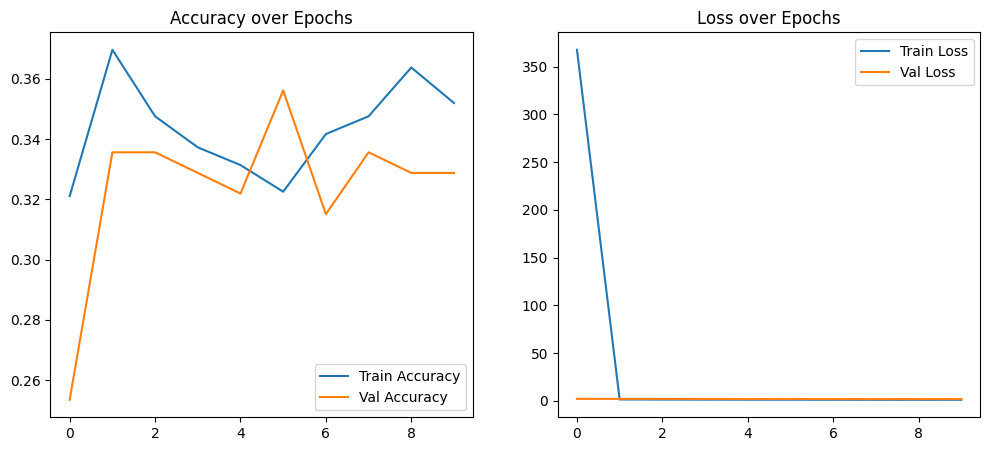

Custom CNN Results:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.3237 - loss: 1.9021
accuracy: 0.3082
loss: 1.9038
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        48
           1       0.24      0.12      0.16        50
           2       0.32      0.75      0.45        48

    accuracy                           0.31       146
   macro avg       0.30      0.31      0.24       146
weighted avg       0.30      0.31      0.24       146



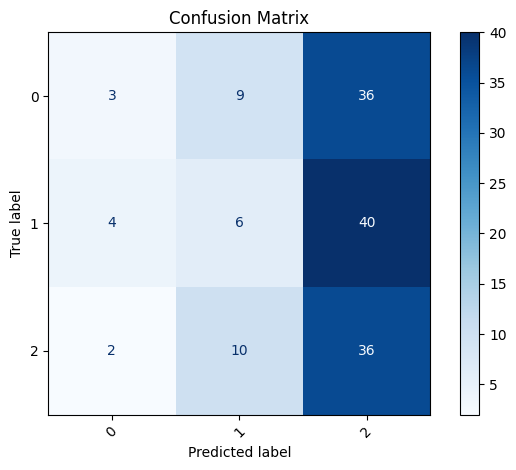


=== Training and Evaluating MobileNetV2 ===
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 828ms/step - accuracy: 0.3491 - loss: 1.7192 - val_accuracy: 0.3630 - val_loss: 1.1669
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 732ms/step - accuracy: 0.4206 - loss: 1.1683 - val_accuracy: 0.4589 - val_loss: 1.0688
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 680ms/step - accuracy: 0.4906 - loss: 1.0291 - val_accuracy: 0.4110 - val_loss: 1.0920
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 750ms/step - accuracy: 0.4742 - loss: 1.0536 - val_accuracy: 0.4315 - val_loss: 1.0622
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 720ms/step - accuracy: 0.5181 - loss: 0.9921 - val_accuracy: 0.4178 - val_loss: 1.0764
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 724ms/step - accuracy: 0.4937 - loss: 1.0047 - val_accuracy: 0.4315 - val_loss: 1.1158
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 725ms/step - accuracy: 0.5268 - loss: 0.9923 - val_accuracy: 0.3836 - val_loss: 1.0985


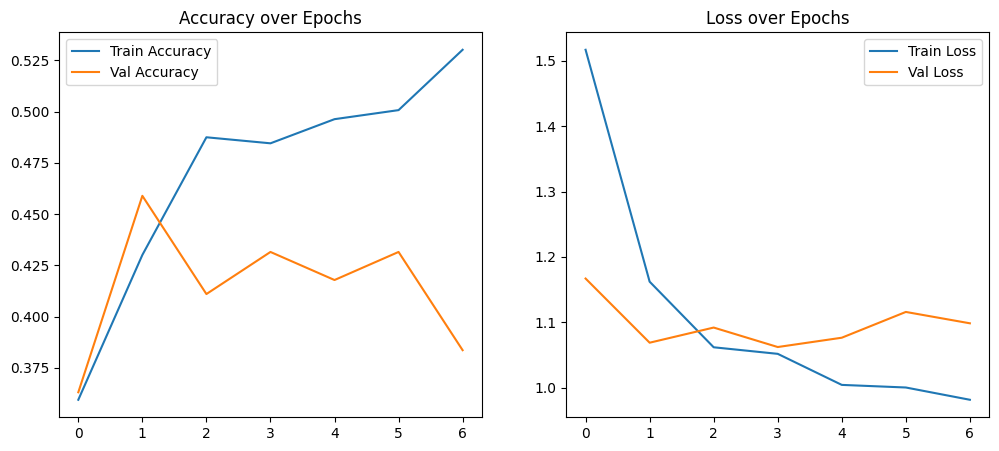

MobileNetV2 Results:
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 0.4389 - loss: 1.0908
accuracy: 0.4247
loss: 1.1079
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 735ms/step
              precision    recall  f1-score   support

           0       0.51      0.38      0.43        48
           1       0.38      0.58      0.46        50
           2       0.43      0.31      0.36        48

    accuracy                           0.42       146
   macro avg       0.44      0.42      0.42       146
weighted avg       0.44      0.42      0.42       146



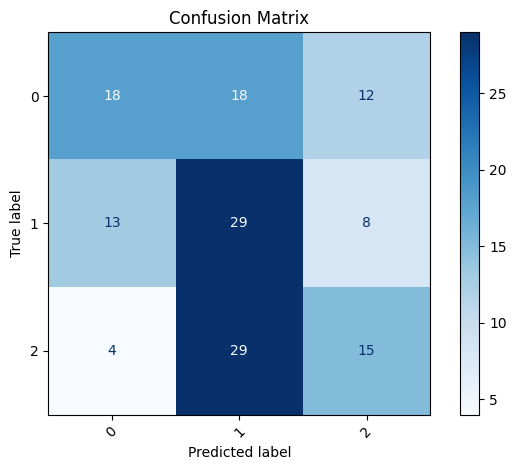

In [3]:
from Code.cnn_recognizer import get_model, train_model, evaluate_model, plot_training_history

# Prepare your test labels
test_labels = test_df['label'].values

# ==========================
# 1. Evaluate CNN
# ==========================
print("\n=== Training and Evaluating Custom CNN ===")
cnn_model = get_model(model_type="cnn", input_shape=(224, 224, 3), num_classes=10)
cnn_model, cnn_history = train_model(cnn_model, train_ds, val_ds, epochs=10)
plot_training_history(cnn_history)
print("Custom CNN Results:")
cnn_results = evaluate_model(cnn_model, test_ds, test_labels=test_labels)

# ==========================
# 2. Evaluate MobileNetV2
# ==========================
print("\n=== Training and Evaluating MobileNetV2 ===")
mobilenet_model = get_model(model_type="mobilenet", input_shape=(224, 224, 3), num_classes=10)
mobilenet_model, mobilenet_history = train_model(mobilenet_model, train_ds, val_ds, epochs=10)
plot_training_history(mobilenet_history)
print("MobileNetV2 Results:")
mobilenet_results = evaluate_model(mobilenet_model, test_ds, test_labels=test_labels)
